#**Clasificación de Tweets  sobre el mundial FIFA 2022 utilizando análisis de sentimientos**


Facultad de Ingeniería, UNAM.

Estudiantes: 
1. Yolanda De Jesus Moreno.
2. Erika Fabiola Fernández Soto.
3. Hugo Adrian Meza Vega.

Importar Bilbiotecas

In [ ]:
#Bibliotecas científicas para la manipulación de datos
import numpy as np
import pandas as pd

#Biblioteca ntlk para tokenizar y obtener corpus de stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#biblioteca para generar gráficas
import matplotlib.pyplot as plt
#Biblioteca para tratamiento de cadenas string
import re
import string


Cargando y pre-procesado de datos 

In [ ]:
#Cargando el dataset desde Github
df_tweets = pd.read_csv("https://raw.githubusercontent.com/hamv15/Analisis-y-Procesamiento-Inteligente-de-Textos/main/fifa_world_cup_2022_tweets.csv")

#Mostrando los primero 10 resgistros del dataset
df_tweets.head(10)

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative
5,5,2022-11-20 23:57:32+00:00,0,Twitter for Android,"And like, will the mexican fans be able to scr...",negative
6,6,2022-11-20 23:57:06+00:00,0,Twitter for Android,Look like a only me and the Jamaican football ...,neutral
7,7,2022-11-20 23:57:05+00:00,0,Twitter for Android,Really? Football on a Monday morning at 9 and ...,negative
8,8,2022-11-20 23:56:10+00:00,1,Twitter for iPhone,"As the World Cup starts in Qatar, it’s Black A...",positive
9,9,2022-11-20 23:56:08+00:00,0,Twitter for iPhone,#WorldCup2022 @ITVSport &amp; @LFSYSTEMMUSIC g...,positive


In [ ]:
print(len(df_tweets))
print(df_tweets.columns.to_list())

22524
['Unnamed: 0', 'Date Created', 'Number of Likes', 'Source of Tweet', 'Tweet', 'Sentiment']


In [ ]:
#Obtención de todas las columnas presentes en el DF
print(df_tweets.columns)

Index(['Unnamed: 0', 'Date Created', 'Number of Likes', 'Source of Tweet',
       'Tweet', 'Sentiment'],
      dtype='object')


In [ ]:
#Para este análisis solo interresa la variable tweet para hacer el análisis de sentimientos.
#Se eliminan las variables sin importancia excepto Tweets y Sentiment
df_tweets.drop(['Unnamed: 0','Date Created','Number of Likes','Source of Tweet'],axis=1,inplace=True)

#Confirmando cambios
df_tweets.head(10)

,Tweet,Sentiment
0,What are we drinking today @TucanTribe \n@MadB...,neutral
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,Worth reading while watching #WorldCup2022 htt...,positive
3,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,"If the BBC cares so much about human rights, h...",negative
5,"And like, will the mexican fans be able to scr...",negative
6,Look like a only me and the Jamaican football ...,neutral
7,Really? Football on a Monday morning at 9 and ...,negative
8,"As the World Cup starts in Qatar, it’s Black A...",positive
9,#WorldCup2022 @ITVSport &amp; @LFSYSTEMMUSIC g...,positive


In [ ]:
# Creación de un diccionario para mapear la variable sentimiento y tener un valor numérico.
class_map = {
    "negative": 0,
    "neutral" : 1,
    "positive": 2
}

#Se realiza un mapeo de los datos para etiquetarlos utilizando el diccionario "class_map"
df_tweets['class'] = df_tweets.Sentiment.map(class_map)

#Se elimina la variable sentiment 
df_tweets.drop(columns = ['Sentiment'], inplace = True)

#Confirmando cambios
df_tweets.head(5)

,Tweet,class
0,What are we drinking today @TucanTribe \n@MadB...,1
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,2
2,Worth reading while watching #WorldCup2022 htt...,2
3,Golden Maknae shinning bright\n\nhttps://t.co/...,2
4,"If the BBC cares so much about human rights, h...",0


Se realiza un procesado a los tweets con el objetivo de hacer el texto más legible reemplazando abreviaturas y contracciones.

In [ ]:
# Lista de contracciones para eliminar
contractions = {
    "a'ight":"alright",
    "ain't":"are not",
    "amn't":"am not",
    "aren't":"are not",
    "can't":"cannot",
    "'cause": "because",
    "could've":"could have",
    "couldn't":"could not",
    "couldn't've":"could not have",
    "daren't":"dare not",
    "daresn't":"dare not",
    "dasn't":"dare not",
    "didn't":"did not",
    "doesn't":"does not",
    "don't":"do not",
    "everybody's":"everybody is",
    "everyone's":"everyone is",
    "giv'n":"given",
    "gonna":"going to",
    "gon't":"go not", 
    "gotta":"got to",
    "hadn't":"had not",
    "had've":"had have",
    "hasn't":"has not",
    "haven't":"have not",
    "he'd":"he had", 
    "he'll":"he will",
    "he's":"he is",
    "here's":"here is",
    "how'd":"how did",
    "how'll":"how will",
    "how're":"how are",
    "how's":"how is",
    "I'd":"I had",
    "I'd've":"I would have",
    "I'd'nt":"I would not",
    "I'd'nt've":"I would not have",
    "I'll":"I will",
    "I'm":"I am",
    "I've":"I have",
    "isn't":"is not",
    "it'd":"it would",
    "it'll":"it will",
    "it's":"it is",
    "let's":"let us",
    "ma'am":"madam",
    "mayn't":"may not",
    "may've":"may have",
    "mightn't":"might not",
    "might've":"might have",
    "mustn't":"must not",
    "mustn't've":"must not have",
    "must've":"must have",
    "needn't":"need not",
    "needn't've":"need not have",
    "o'clock":"of the clock",
    "oughtn't":"ought not",
    "oughtn't've":"ought not have",
    "shan't":"shall not",
    "she'd":"she would",
    "she'll":"she will",
    "she's":"she is",
    "should've":"should have",
    "shouldn't":"should not",
    "shouldn't've":"should not have",
    "somebody's":"somebody is",
    "someone's":"someone is",
    "something's":"something is",
    "so're":"so are",
    "so’s":"so is",
    "so’ve":"so have",
    "that'll":"that will",
    "that're":"that are",
    "that's":"that is",
    "that'd":"that would",
    "there'd":"there would",
    "there'll":"there will",
    "there're":"there are",
    "there's":"there is",
    "these're":"these are",
    "these've":"these have",
    "they'd":"they would",
    "they'll":"they will",
    "they're":"they are",
    "they've":"they have",
    "this's":"this is",
    "those're":"those are",
    "those've":"those have",
    "to've":"to have",
    "wasn't":"was not",
    "we'd":"we would",
    "we'd've":"we would have",
    "we'll":"we will",
    "we're":"we are",
    "we've":"we have",
    "weren't":"were not",
    "what'd":"what did",
    "what'll":"what will",
    "what're":"what are",
    "what's":"what is",
    "what've":"what have",
    "when's":"when is",
    "where'd":"where did",
    "where'll":"where will",
    "where're":"where are",
    "where's":"where is",
    "where've":"where have",
    "which'd":"which would",
    "which'll":"which will",
    "which're":"which are",
    "which's":"which is",
    "which've":"which have",
    "who'd":"who would",
    "who'd've":"who would have",
    "who'll":"who will",
    "who're":"who are",
    "who's":"who is",
    "who've":"who have",
    "why'd":"why did",
    "why're":"why are",
    "why's":"why is",
    "won't":"will not",
    "would've":"would have",
    "wouldn't":"would not",
    "wouldn't've":"would not have",
    "y'at":"you at",
    "yes’m":"yes madam",
    "you'd":"you would",
    "you'll":"you will",
    "you're":"you are",
    "you've":"you have"
}

In [ ]:
# Lista de abreviaciones para reemplazar
abbreviations = {
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [ ]:
#Declaración de función destinada a reemplazar las contracciones
def expand_contractions(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [ ]:
#Declaración de función para expandir abreviaciones
def expand_abbreviations(sentence):
    final_words=[]
    words=sentence.split()
    final_words= [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return " ".join(final_words)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Función para la limpieza de los tweets y tokenización del texto.
#Con esta función se limpian los textos y se eliminan las stopwords del corpus de NLTK para el idioma ingles
def clean_text(sentence):
    sentence = sentence.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    sentence = pattern.sub('', sentence)
    sentence = " ".join(filter(lambda x:x[0]!='@', sentence.split()))
    emo = re.compile("["
                           u"\U0001F600-\U0001FFFF"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF" 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE
                    )
    sentence = emo.sub(r'', sentence)
    sentence = sentence.lower()
    sentence = expand_contractions(sentence)
    sentence = expand_abbreviations(sentence)
    sentence = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", sentence)
    tokens = word_tokenize(sentence)
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    stop_words = set(stopwords.words("english"))
    words = [w for w in words if not w in stop_words]
    return " ".join(words)

In [ ]:
#Aplicando la función clean_text a todos los tweets del dataset
df_tweets['cleaned_tweets'] = df_tweets['Tweet'].apply(lambda x: clean_text(x))

In [ ]:
#Comprobación del procesado de texto
df_tweets.head(10)

,Tweet,class,cleaned_tweets
0,What are we drinking today @TucanTribe \n@MadB...,1,drinking today
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,2,amazing launch video shows much face canada me...
2,Worth reading while watching #WorldCup2022 htt...,2,worth reading watching
3,Golden Maknae shinning bright\n\nhttps://t.co/...,2,golden maknae shinning bright jeonjungkook jun...
4,"If the BBC cares so much about human rights, h...",0,british broadcasting corporation cares much hu...
5,"And like, will the mexican fans be able to scr...",0,like mexican fans able scream puto homophobic ...
6,Look like a only me and the Jamaican football ...,1,look like jamaican football team naw follow wo...
7,Really? Football on a Monday morning at 9 and ...,0,really football monday morning need pinch real...
8,"As the World Cup starts in Qatar, it’s Black A...",2,world cup starts qatar black awareness day bra...
9,#WorldCup2022 @ITVSport &amp; @LFSYSTEMMUSIC g...,2,amp go together well hungry love


Proceso para guardar el csv de los tweets recuperados mediante web scrapping. El csv de datos se exporta a nuestra carpeta de proyecto en google drive.

# Aplicación de Algoritmo Naive Bayers

En este apartado se realiza la construcción del modelo Naive Bayes proporcionado por la API sklearn. 
Se realiza la separación de los datos de entrenamiento siguiendo el criterio de 80% entrenamiento y 20% validación.
Los datos para entrenar el modelo son los datos del dataset que cuenta con las etiquetas de sentimiento. Mismo que se procesó en este notebook para la limpieza de los tweets, reemplazando contracciones y abreviaciones.

In [ ]:
from sklearn.model_selection import train_test_split # Para la división de los datos de entrenamiento 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+') # tokenizador para CountVectorizer
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize) 

X = df_tweets['cleaned_tweets'] #  Segmento de datos para variables predictoras del modelo
Y = df_tweets['class'] # Variable clase o variable de salida
train_text, test_text, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=42) # División de los datos 80/20

X_train = cv.fit_transform(train_text.values.astype('U'))
X_test = cv.transform(test_text.values.astype('U'))

In [ ]:
X_train

<18019x18685 sparse matrix of type '<class 'numpy.int64'>'
	with 149545 stored elements in Compressed Sparse Row format>

In [ ]:
# Importando el modelo MultinomialNB del paquete sklearn
from sklearn.naive_bayes import MultinomialNB 

#Entrenamiento del modelo
nb = MultinomialNB()
nb.fit(X_train, Y_train) 

print ("Train accuracy = {:.2f}%".format(nb.score(X_train,Y_train)*100))
print ("Test accuracy = {:.2f}%".format(nb.score(X_test,Y_test)*100))
train_acc_nb=nb.score(X_train,Y_train)
test_acc_nb=nb.score(X_test,Y_test)



Train accuracy = 79.50%
Test accuracy = 67.26%


In [ ]:
#Tabla de Comprobación del modelo mediante los datos de prueba
values=pd.DataFrame()
values["Reales"]=Y_test
values["Pronosticados"]=nb.predict(X_test)

In [ ]:
values.head(10)

,Reales,Pronosticados
16498,1,1
15542,0,2
11893,1,2
5496,1,0
4645,1,1
8158,0,0
21376,1,2
9041,0,0
18148,1,1
14581,2,2


In [ ]:
#Matriz de clasificación
ModelClasification = nb.predict(X_test)
Mat_Clasification = pd.crosstab(Y_test.ravel(),
                                    ModelClasification,
                                    rownames=['Reales'],
                                    colnames=['Clasificación']) 
Mat_Clasification

Clasificación,0,1,2
Reales,,,
0,858,187,104
1,347,910,391
2,123,323,1262


In [ ]:
#Reporte de la clasificación
print("Exactitud:", accuracy_score(Y_test, ModelClasification))
print(classification_report(Y_test, ModelClasification))

Exactitud: 0.6725860155382908
              precision    recall  f1-score   support

           0       0.65      0.75      0.69      1149
           1       0.64      0.55      0.59      1648
           2       0.72      0.74      0.73      1708

    accuracy                           0.67      4505
   macro avg       0.67      0.68      0.67      4505
weighted avg       0.67      0.67      0.67      4505



In [ ]:
#Rendimiento de las clases (sentimientos) en el modelo Naive Bayes
from sklearn.preprocessing import label_binarize
y_score = nb.predict_proba(X_test)
y_test_bin = label_binarize(Y_test, classes=[0, 
                                              1, 
                                              2])
n_classes = y_test_bin.shape[1]

AUC para la clase 0 (Negative): 0.8902410086606896
AUC para la clase 1 (Neutral): 0.7947032667167337
AUC para la clase 2 (Positive): 0.8686244001811912


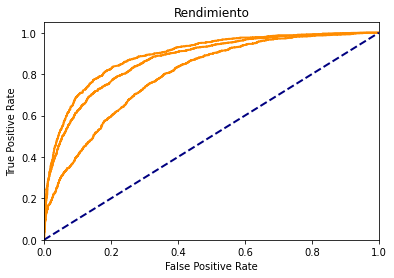

In [ ]:
#Se calcula la curva ROC y el área bajo la curva para cada clase
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  if i==0:
    print('AUC para la clase {} (Negative): {}'.format(i ,auc(fpr[i], tpr[i])))
  if i==1:
    print('AUC para la clase {} (Neutral): {}'.format(i ,auc(fpr[i], tpr[i])))
  if i==2:
    print('AUC para la clase {} (Positive): {}'.format(i ,auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Rendimiento')
plt.show()

Train accuracy = 79.50%
Test accuracy = 67.26%


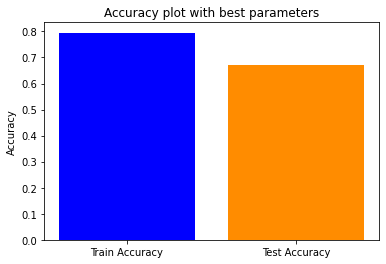

In [ ]:
#importing matplotlib to plot bar graph

import matplotlib.pyplot as plt

data_nb = [train_acc_nb,test_acc_nb]
labels = ['Train Accuracy','Test Accuracy']

print ("Train accuracy = {:.2f}%".format(nb.score(X_train,Y_train)*100))
print ("Test accuracy = {:.2f}%".format(nb.score(X_test,Y_test)*100))
train_acc_nb=nb.score(X_train,Y_train)
test_acc_nb=nb.score(X_test,Y_test)
plt.xticks([0,1], labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar([0,1], data_nb, color=['blue','darkorange']) 
plt.show()

#Poniendo a prueba el modelo para la clasificación de nuevos tweets

In [ ]:
#Se importan los datos obtenidos mediante web sraping para ingresarlos al modelo entrenado
live_data = pd.read_csv('scraped_tweets_snscrape.csv')
live_data.head(10)


,Tweets,Username,Date
0,Craig Gordon's amazing recovery save.\n\nThis ...,T_I_F_G,2023-01-13 19:30:30+00:00
1,Bills provide update on Damar Hamlin; safety r...,SportsExtremes2,2023-01-13 19:27:29+00:00
2,£7/100k £58/1m Fifa coins 2.5m DM me if intere...,CamSmith147,2023-01-13 19:17:07+00:00
3,The 10 best summer signings in the WSL after 4...,fut_post,2023-01-13 19:15:52+00:00
4,Best Sinulog venue ever is Jemandee Review Cen...,byrondee,2023-01-13 19:14:53+00:00
5,FIFA 23- Season Progress (Winter Nobility Leve...,2007killa,2023-01-13 19:14:15+00:00
6,$IBGR Updated Press https://t.co/yDjaOjJLBT #P...,dubaisend,2023-01-13 19:10:06+00:00
7,Croatia face Canada in the 2nd group game of o...,utd16bit,2023-01-13 19:06:15+00:00
8,How many gamers are playing? #FIFA 23 Live Pla...,PlayerCounter,2023-01-13 19:05:04+00:00
9,"Carragher: ""There's no wonder you failed at Va...",GaryAndCarra,2023-01-13 19:02:14+00:00


In [ ]:
# Eliminación de las columnas que no se utilizan
live_data.drop(columns = ['Username', 'Date'])

,Tweets
0,Craig Gordon's amazing recovery save.\n\nThis ...
1,Bills provide update on Damar Hamlin; safety r...
2,£7/100k £58/1m Fifa coins 2.5m DM me if intere...
3,The 10 best summer signings in the WSL after 4...
4,Best Sinulog venue ever is Jemandee Review Cen...
...,...
95,🚨 @FIFAcom invites tender in Germany for sale ...
96,Last year saw the rise of mega sporting events...
97,Last year saw the rise of mega sporting events...
98,@fifaMorocco2022 We still don’t know so far wh...


In [ ]:
#Procesamiento del texto de los teewts
live_data['cleaned_tweets'] = live_data.Tweets.apply(lambda x: clean_text(x))

In [ ]:
# Modelando los datos nuevos (live_input)
live_input = cv.transform(live_data['cleaned_tweets'].values.astype('U'))
live_predictions = nb.predict(live_input)

In [ ]:
live_predictions

array([2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 0, 2, 0, 1,
       1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#Printing predictions
for i in range(len(live_predictions)):
    print("Original Tweet")
    print(live_data.Tweets[i], end = '\n\n')
    print('Cleaned Tweet')
    print(live_data.cleaned_tweets[i], end = '\n\n')
    if(live_predictions[i] == 0):
        print("Prediction: Negative\n")
    elif(live_predictions[i] == 1):
        print("Prediction: Neutral\n")
    else:
        print("Prediction: Positive\n")

Original Tweet
Craig Gordon's amazing recovery save.

This is FIFA 22 for Xbox Series S. ⚽🎮

#FIFA22 #FIFA #XboxSeriesS https://t.co/dKWKwpLa9U

Cleaned Tweet
craig gordons amazing recovery save fifa xbox series fifa xboxseriess

Prediction: Positive

Original Tweet
Bills provide update on Damar Hamlin; safety remains in critical condition after night in intensive care https://t.co/QIvAr9vt1d #sports #football #baseball #basketball #sports #news #news #breaking #news #fifa #soccer

Cleaned Tweet
bills provide update damar hamlin safety remains critical condition night intensive care sports football baseball basketball sports news news breaking news fifa soccer

Prediction: Neutral

Original Tweet
£7/100k £58/1m Fifa coins 2.5m DM me if interested #fut #ps5 #fifa #toty #nextgen #Xbox

Cleaned Tweet
fifa coins direct message interested fut fifa toty nextgen xbox

Prediction: Neutral

Original Tweet
The 10 best summer signings in the WSL after 4 months, from Aston Villa to Man United🤝
-
h

In [ ]:
#Como ultimo paso, exportamos el modelo entrenado a un archivo joblib con el objetivo de recuperar el modelo y hacer clasificaciones nuevas sin la
#necesidad de contruir y entrenar el modelo desde cero
  #Biblioteca necesria para exportar el modelo entrenado
from joblib import dump


dump(nb, 'MultinomialNaiveBallesFIFA.joblib')

['MultinomialNaiveBallesFIFA.joblib']

Guardado del modelo en la carpeta de Google Drive del proyecto

In [ ]:
file = drive.CreateFile({'parents':[{u'id': '1FXY_E5LZPdhlyfp3J8EwEfuiRbGWNccZ'}]}) 
file.SetContentFile("MultinomialNaiveBallesFIFA.joblib")
file.Upload()

#Apartado para importar modelo entrenado y generar nuevas clasificaciones

In [ ]:
#Biblioteca necesaria para importar modelo se scikit learn
from joblib import load
#Se recupera el modelo multinomial Naive Bayes que fue entrenado con el dataset de tweeters sobre FIFA 2022
NaiveBayesFIFA=load('MultinomialNaiveBallesFIFA.joblib')

# Web scraping 

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 7.3 MB/s eta 0:00:00


In [ ]:
import snscrape.modules.twitter as sntwitter
tweet_data = []
words="FIFA"
number = int(input("Ingrese el número de tweets a obtener: "))
for i, tweets in enumerate(sntwitter.TwitterHashtagScraper(f'#{words} lang:en').get_items()):
    if i > number-1:
        break
    tweet_data.append([tweets.content, tweets.username, tweets.date])
df = pd.DataFrame(tweet_data, columns=['Tweets', 'Username', 'Date'])
#print(df)
filename = 'scraped_tweets_snscrape.csv'
df.to_csv(filename, index = False)

Ingrese el número de tweets a obtener: 100


<ipython-input-37-6bd7ea5dcaba>:9: FutureWarning: content is deprecated, use rawContent instead
  tweet_data.append([tweets.content, tweets.username, tweets.date])
<ipython-input-37-6bd7ea5dcaba>:9: FutureWarning: username is deprecated, use user.username instead
  tweet_data.append([tweets.content, tweets.username, tweets.date])


In [ ]:
df

,Tweets,Username,Date
0,£7/100k £58/1m Fifa coins 2.5m DM me if intere...,CamSmith147,2023-01-13 19:17:07+00:00
1,The 10 best summer signings in the WSL after 4...,fut_post,2023-01-13 19:15:52+00:00
2,Best Sinulog venue ever is Jemandee Review Cen...,byrondee,2023-01-13 19:14:53+00:00
3,FIFA 23- Season Progress (Winter Nobility Leve...,2007killa,2023-01-13 19:14:15+00:00
4,$IBGR Updated Press https://t.co/yDjaOjJLBT #P...,dubaisend,2023-01-13 19:10:06+00:00
...,...,...,...
95,Last year saw the rise of mega sporting events...,ETPlayPodcast,2023-01-13 14:36:19+00:00
96,@fifaMorocco2022 We still don’t know so far wh...,mersongs,2023-01-13 14:31:50+00:00
97,House speaker race upended as GOP infighting s...,SportsExtremes2,2023-01-13 14:28:33+00:00
98,1 MILLION #FIFA23 Coins order complete ✅ \nBef...,_CFCFX,2023-01-13 14:25:01+00:00


Proceso de guardado en carpeta del proyecto en google drive

In [ ]:
#Se instala biblioteca PyDrive en caso de que no se tenga instalada
!pip install -U -q PyDrive

In [ ]:

#Importación de bibliotecas para la conexión a google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file = drive.CreateFile({'parents':[{u'id': '1FXY_E5LZPdhlyfp3J8EwEfuiRbGWNccZ'}]}) 
file.SetContentFile(filename)
file.Upload()